# Self-Driving Car Engineer Nanodegree


## Project: **Advanced Lane Finding** 
***
In this project, your goal is to write a software pipeline to identify the lane boundaries in a video from a front-facing camera on a car. The camera calibration images, test road images, and project videos are available in the project repository.

---
**The Writeup**
The writeup will be the primary output you submit (along with your code of course).

Within the project repository, there is a writeup template that you can use as a starting point for your project writeup.

A great writeup should include the rubric points as well as your description of how you addressed each point. You should include a detailed description of the code used in each step (with line-number references and code snippets where appropriate) and links to other supporting documents or external references. You should also include images in your writeup to illustrate how your code works.

All that said, please be concise! We're not looking for you to write a book, just a brief description of how you passed each rubric point, and references to the relevant code :)

You are not required to use Markdown for your writeup. If you use another method, please just submit a PDF of your writeup.

**The Code**
Your code should stand on its own as readable material. Explain in code comments, as well as in your writeup, how your code works and why you wrote it that way.

Make it easy for a reviewer to understand your code.

You are more than welcome to use code from the lesson. But if you copy something explain how it works and why you used it.

**What It Takes to Pass**
Read the project rubric for details on the requirements for a passing submission.

Your writeup should include each rubric point and your description of how you addressed that point in your submission. The project repo provides an example template for your writeup.

There is no starter code provided, but you are welcome to use code from the lesson and quizzes as you like. You may complete the project in a Jupyter notebook, but it's not required. Feel free to build it as a standalone project.

To help the reviewer evaluate your project, please save example images from each stage of your pipeline to the output_images folder and provide in your writeup a description of each image. Please also save your output video and include it with your submission.

**Evaluation**
Once you have completed your project, double check the Project Rubric to make sure you have addressed all the rubric points. Your project will be evaluated by a Udacity reviewer according to that same rubric.

Your project must "meet specifications" in each category in order for your submission to pass. If you are happy with your submission, then you are ready to submit! If you see room for improvement in any category in which you do not meet specifications, keep working!

**Submission**
What to Include
Include a zipped file with your:

**writeup**
code (or a Jupyter notebook)
example output images
output video
Alternatively, you may submit a link to your GitHub repo for the project.

In either case, remember to include example images for each stage of your pipeline and your final output video in your submission.

---

**Run the cell below to import some packages.  If you get an `import error` for a package you've already installed, try changing your kernel (select the Kernel menu above --> Change Kernel).  Still have problems?  Try relaunching Jupyter Notebook from the terminal prompt.  Also, see [this forum post](https://carnd-forums.udacity.com/cq/viewquestion.action?spaceKey=CAR&id=29496372&questionTitle=finding-lanes---import-cv2-fails-even-though-python-in-the-terminal-window-has-no-problem-with-import-cv2) for more troubleshooting tips.**  

## Import Packages

In [5]:
# Code Block 01
#importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import math
import glob
import os
from sklearn.externals import joblib
from skimage.feature import hog
from sklearn.preprocessing import StandardScaler
%matplotlib inline

## Loading Images for Training

In [900]:
# Code Block 02
folder_cars1 = "training/small/vehicles_smallset/cars1/"
folder_noncars1 = "training/small/non-vehicles_smallset/notcars1/"
os.listdir(folder_cars1)

['270.jpeg',
 '312.jpeg',
 '114.jpeg',
 '128.jpeg',
 '269.jpeg',
 '248.jpeg',
 '328.jpeg',
 '37.jpeg',
 '239.jpeg',
 '362.jpeg',
 '335.jpeg',
 '365.jpeg',
 '215.jpeg',
 '290.jpeg',
 '230.jpeg',
 '261.jpeg',
 '350.jpeg',
 '30.jpeg',
 '234.jpeg',
 '267.jpeg',
 '254.jpeg',
 '260.jpeg',
 '149.jpeg',
 '161.jpeg',
 '289.jpeg',
 '103.jpeg',
 '217.jpeg',
 '264.jpeg',
 '214.jpeg',
 '200.jpeg',
 '392.jpeg',
 '94.jpeg',
 '134.jpeg',
 '305.jpeg',
 '173.jpeg',
 '176.jpeg',
 '13.jpeg',
 '148.jpeg',
 '40.jpeg',
 '33.jpeg',
 '66.jpeg',
 '83.jpeg',
 '146.jpeg',
 '188.jpeg',
 '107.jpeg',
 '374.jpeg',
 '9.jpeg',
 '165.jpeg',
 '356.jpeg',
 '387.jpeg',
 '283.jpeg',
 '224.jpeg',
 '388.jpeg',
 '343.jpeg',
 '99.jpeg',
 '204.jpeg',
 '60.jpeg',
 '62.jpeg',
 '318.jpeg',
 '80.jpeg',
 '245.jpeg',
 '4.jpeg',
 '10.jpeg',
 '351.jpeg',
 '287.jpeg',
 '379.jpeg',
 '338.jpeg',
 '111.jpeg',
 '36.jpeg',
 '77.jpeg',
 '2.jpeg',
 '72.jpeg',
 '129.jpeg',
 '400.jpeg',
 '327.jpeg',
 '225.jpeg',
 '74.jpeg',
 '35.jpeg',
 '207.jpeg

This image is: <class 'numpy.ndarray'> with dimesions: (64, 128, 3)


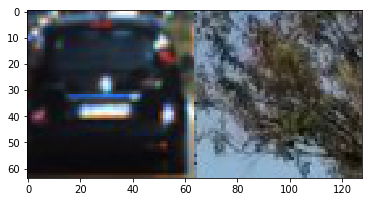

In [4]:
# Code Block 03
#reading in an image
image1 = mpimg.imread(folder_cars1+'272.jpeg')
image2 = mpimg.imread(folder_noncars1+'extra02.jpeg')
both = np.concatenate((image1,image2),axis = 1)
#printing out some stats and plotting
print('This image is:', type(both), 'with dimesions:', both.shape)
plt.imshow(both)  # if you wanted to show a single color channel image called 'gray', for example, call as plt.imshow(gray, cmap='gray')

## Ideas for Lane Detection Pipeline

**Some OpenCV functions (beyond those introduced in the lesson) that might be useful for this project are:**

`cv2.inRange()` for color selection  
`cv2.fillPoly()` for regions selection  
`cv2.line()` to draw lines on an image given endpoints  
`cv2.addWeighted()` to coadd / overlay two images
`cv2.cvtColor()` to grayscale or change color
`cv2.imwrite()` to output images to file  
`cv2.bitwise_and()` to apply a mask to an image

**Check out the OpenCV documentation to learn about these and discover even more awesome functionality!**

## Helper Functions

Below are some helper functions to help get you started. They should look familiar from the lesson!

In [6]:
# Code Block 04
"""
This functions are mostly inherited for project 1 with some additionals
"""

def grayscale(img):
    """Applies the Grayscale transform
    This will return an image with only one color channel
    but NOTE: to see the returned image as grayscale
    (assuming your grayscaled image is called 'gray')
    you should call plt.imshow(gray, cmap='gray')"""
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Or use BGR2GRAY if you read an image with cv2.imread()
    # return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
def canny(img, low_threshold, high_threshold):
    """Applies the Canny transform"""
    return cv2.Canny(img, low_threshold, high_threshold)

def gaussian_blur(img, kernel_size):
    """Applies a Gaussian Noise kernel"""
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)

def region_of_interest(img, vertices):
    """
    Applies an image mask.
    
    Only keeps the region of the image defined by the polygon
    formed from `vertices`. The rest of the image is set to black.
    """
    #defining a blank mask to start with
    mask = np.zeros_like(img)   
    
    #defining a 3 channel or 1 channel color to fill the mask with depending on the input image
    if len(img.shape) > 2:
        channel_count = img.shape[2]  # i.e. 3 or 4 depending on your image
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255
        
    #filling pixels inside the polygon defined by "vertices" with the fill color    
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    
    #returning the image only where mask pixels are nonzero
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image


def draw_lines(img, lines, color=[255, 0, 0], thickness=2):
    """
    NOTE: this is the function you might want to use as a starting point once you want to 
    average/extrapolate the line segments you detect to map out the full
    extent of the lane (going from the result shown in raw-lines-example.mp4
    to that shown in P1_example.mp4).  
    
    Think about things like separating line segments by their 
    slope ((y2-y1)/(x2-x1)) to decide which segments are part of the left
    line vs. the right line.  Then, you can average the position of each of 
    the lines and extrapolate to the top and bottom of the lane.
    
    This function draws `lines` with `color` and `thickness`.    
    Lines are drawn on the image inplace (mutates the image).
    If you want to make the lines semi-transparent, think about combining
    this function with the weighted_img() function below
    """
    for line in lines:
        for x1,y1,x2,y2 in line:
            cv2.line(img, (x1, y1), (x2, y2), color, thickness)

def hough_lines(img, rho, theta, threshold, min_line_len, max_line_gap):
    """
    `img` should be the output of a Canny transform.
        
    Returns an image with hough lines drawn.
    """
    lines = cv2.HoughLinesP(img, rho, theta, threshold, np.array([]), minLineLength=min_line_len, maxLineGap=max_line_gap)
    line_img = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
    draw_lines(line_img, lines)
    return line_img

# Python 3 has support for cool math symbols.

def weighted_img(img, initial_img, α=0.8, β=1., λ=0.):
    """
    `img` is the output of the hough_lines(), An image with lines drawn on it.
    Should be a blank image (all black) with lines drawn on it.
    
    `initial_img` should be the image before any processing.
    
    The result image is computed as follows:
    
    initial_img * α + img * β + λ
    NOTE: initial_img and img must be the same shape!
    """
    return cv2.addWeighted(initial_img, α, img, β, λ)

def drawline_alphab(lines, img, boty, topy):
    '''
    This function draws `lines` with `color` and `thickness`
    based on its slope and the y-intercept.
    They start from the bottom of the image seted (boty) to the top
    (topy).
    Lines are drawn on the image inplace (mutates the image).
    If you want to make the lines semi-transparent, think about combining
    this function with the weighted_img() function below
    '''
    # An empty canvas is prepared based on the original image dimensions
    line_img = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
    lanes = []
    for line in lines:
        if line[0]!=math.pi/4:
            m = math.tan(line[0])
        else:
            # In case of a vertical line the max slope is set to 1000
            m = 1000
        # based on the coordinates and the top values, the X,Y points are
        # calculated
        Y1 = topy
        X1 = (Y1-line[1]) / m
        Y0 = boty
        X0 = (Y0-line[1]) / m
        lane1=[[[int(X0), int(Y0), int(X1), int(Y1)]]]
        lanes+=lane1
    # Now the lines are draw in the canvas
    draw_lines(line_img, lanes, color=[255, 0, 0], thickness=8)
    return weighted_img(line_img, img)

def weigthed_sum(Lines):
    '''
    This funtion calculates the weighted sum of lines stored in alpha angle of inclination
    B as its y-intercept and L its lengths.
    Returns an [int a, int b] with the total sum of the angle and the y-intercept
    '''
    totalA = 0
    totalB = 0
    total_length = 0
    for a, b, l in Lines:
        totalA += a*l
        totalB += b*l
        total_length+=l
    totalA/=total_length
    totalB/=total_length

    return [totalA, totalB]


# Define a function to return HOG features and visualization
def get_hog_features(img, orient, pix_per_cell, cell_per_block, vis=False, feature_vec=True):
    if vis == True:
        # Use skimage.hog() to get both features and a visualization
        features ,hog_image = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell,pix_per_cell) , cells_per_block=(cell_per_block, cell_per_block), visualise=vis, feature_vector=feature_vec)
        return features, hog_image
    else:      
        # Use skimage.hog() to get features only
        features = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell,pix_per_cell) , cells_per_block=(cell_per_block, cell_per_block), visualise=vis, feature_vector=feature_vec)
        return features



## Test Images

Build your pipeline to work on the images in the directory "test_images"  
**You should make sure your pipeline works well on these images before you try the videos.**

It's important to know we are able to reach the test files first in order to try the pipeline

(7, 7, 2, 2, 6)


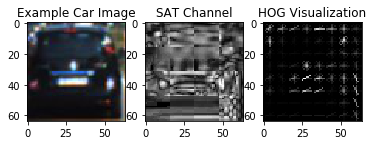

In [913]:
# Code Block 07
image1 = mpimg.imread(folder_cars1+'272.jpeg')
image1 = cv2.resize(image1, (64,64))
gray = cv2.cvtColor(image1, cv2.COLOR_RGB2GRAY)
hsv = cv2.cvtColor(image1, cv2.COLOR_RGB2HSV)
sat = hsv[:,:,1]

orient = 6
pix_per_cell = 8
cell_per_block = 2
# Call our function with vis=True to see an image output
features, hog_image = get_hog_features(gray, orient, 
                        pix_per_cell, cell_per_block, 
                        vis=True, feature_vec=False)

# Plot the examples
fig = plt.figure()
plt.subplot(131)
plt.imshow(image1)
plt.title('Example Car Image')
plt.subplot(132)
plt.imshow(sat, cmap='gray')
plt.title('SAT Channel')
plt.subplot(133)
plt.imshow(hog_image, cmap='gray')
plt.title('HOG Visualization')
print(features.shape)

Sat dimentions:  (32, 32)
Hog elements: (1176,) Sat elements:  (1024,)
Final vector elements (2200, 1)


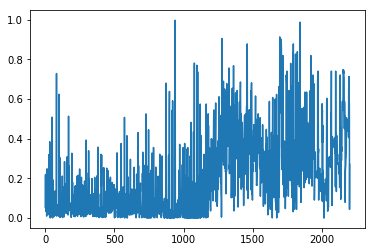

In [7]:
# Code Block 07
res = cv2.resize(sat,None,fx=1/2, fy=1/2, interpolation = cv2.INTER_CUBIC)
print("Sat dimentions: ",res.shape)

feature_list = [features.ravel()/0.5, res.ravel().astype(np.float64)/255.0]
# Create an array stack, NOTE: StandardScaler() expects np.float64
X = np.concatenate(feature_list).astype(np.float64)
X = X.reshape(-1, 1)
print("Hog elements:",feature_list[0].shape,"Sat elements: ", feature_list[1].shape)
print("Final vector elements", X.shape)

plt.plot(X)

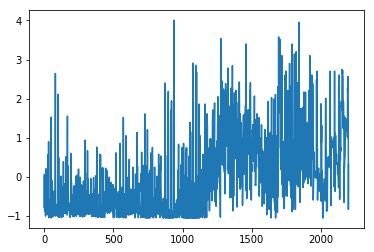

In [8]:
# Code Block 08
# Fit a per-column scaler
X_scaler = StandardScaler().fit(X)
# Apply the scaler to X
scaled_X = X_scaler.transform(X)
plt.plot(scaled_X)

(2200,)


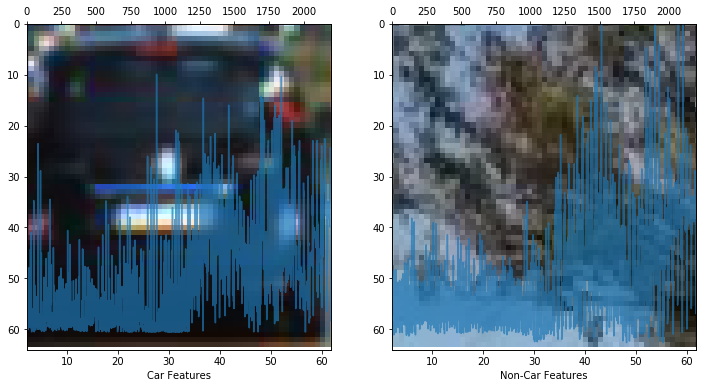

In [9]:
# Code Block 09
def featurizer(img):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    sat = hsv[:,:,1]

    orient = 6
    pix_per_cell = 8
    cell_per_block = 2
    # Call our function with vis=True to see an image output
    features = get_hog_features(gray, orient, 
                pix_per_cell, cell_per_block, 
                vis=False, feature_vec=False)
    res = cv2.resize(sat,None,fx=1/2, fy=1/2, interpolation = cv2.INTER_CUBIC)
    feature_list = [features.ravel()/0.5, res.ravel().astype(np.float64)/255.0]
    # Create an array stack, NOTE: StandardScaler() expects np.float64
    X = np.concatenate(feature_list).astype(np.float64)
    X = X.reshape(-1, 1)
    X_scaler = StandardScaler().fit(X)
    # Apply the scaler to X
    scaled_X = X_scaler.transform(X)
    return np.ravel(scaled_X)

fig_size= [12, 6]
plt.rcParams["figure.figsize"] = fig_size

feat1 = featurizer(image1)

fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.imshow(image1)
ax1.set_aspect('equal')
ax2 = ax1.twiny()
ax2.plot(-feat1*10+50, alpha=0.7)
ax2.set_xlim([0,2200])
ax2.set_ylim([64,0])
ax1.set_xlim([0,64])
ax1.set_ylim([64,0])
ax1.set_xlabel('Car Features')
feat2 = featurizer(image2)

axa = fig.add_subplot(122)
axa.imshow(image2)
axa.set_aspect('equal')
axb = axa.twiny()
axb.plot(-feat2*10+50, alpha=0.7)
axb.set_xlim([0,2200])
axb.set_ylim([64,0])
axa.set_xlim([0,64])
axa.set_ylim([64,0])
axa.set_xlabel('Non-Car Features')
print(feat1.shape)

In [10]:
# Code Block 10
# And our file dirs for the pipeline test
images_cars = glob.glob(folder_cars1 + '*.jpeg')
images_notcars = glob.glob(folder_noncars1 + '*.jpeg')
Y = []
X = []
for image_name in images_cars:
    image = mpimg.imread(image_name)
    if len(image):
        tempfeat = featurizer(image)
        X.append(tempfeat)
        Y.append(1)
for image_name in images_notcars:
    image = mpimg.imread(image_name)
    if len(image):
        tempfeat = featurizer(image)
        X.append(tempfeat)
        Y.append(0)
print(len(Y))
print(len(X))

796
796


In [11]:
# Code Block 11

# Shuffle the data
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [12]:
# Code Block 12
print("The train set length is:")
print("Labels ", len(y_train))
print("Samples ", len(X_train))
print("The test set length is:")
print("Labels ", len(y_test))
print("Samples ", len(X_test))

The train set length is:
Labels  636
Samples  636
The test set length is:
Labels  160
Samples  160


In [13]:
# Code Block 13
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train, y_train)
train_precision = clf.score(X_train, y_train)
test_precision = clf.score(X_test, y_test)
print("train precision: ",train_precision)
print("test_precision: ", test_precision)

train precision:  1.0
test_precision:  0.95


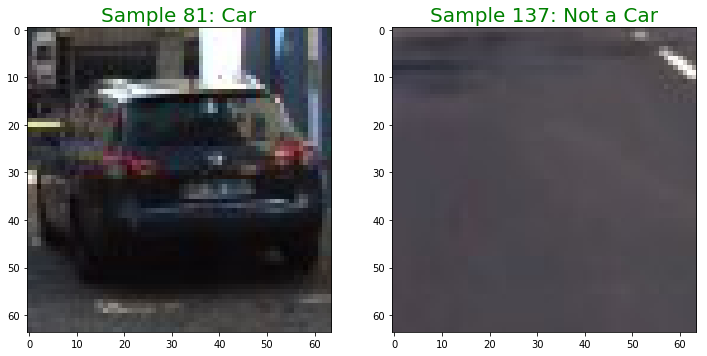

In [14]:
# Code Block 14
import random as rd

image_ind1 = rd.randint(0, len(images_cars)-1)
testimg1 = mpimg.imread(images_cars[image_ind1])
testfeat1 = featurizer(testimg1)

image_ind2 = rd.randint(0, len(images_notcars)-1)
testimg2 = mpimg.imread(images_notcars[image_ind2])
testfeat2 = featurizer(testimg2)

fig_size= [12, 6]
plt.rcParams["figure.figsize"] = fig_size

fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.imshow(testimg1)
if clf.predict([testfeat1]):
    ax1.set_title('Sample '+str(image_ind1)+': Car', color = 'green', fontsize=20)
else:
    ax1.set_title('Sample '+str(image_ind1)+': Not a Car', color = 'red', fontsize=20)

axa = fig.add_subplot(122)
axa.imshow(testimg2)
if clf.predict([testfeat2]):
    axa.set_title('Sample '+str(image_ind2)+': Car', color = 'red', fontsize=20)
else:
    axa.set_title('Sample '+str(image_ind2)+': Not a Car', color = 'green', fontsize=20)


## Saving point

In [821]:
# Code Block 15
# Save the model for future use

joblib.dump(clf, 'SVCmodel.pkl') 

NameError: name 'clf' is not defined

In [823]:
# Code Block 16
clf2 = joblib.load('SVCmodel.pkl') 

### Sliding windows model

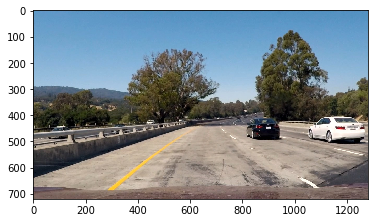

In [19]:
# Code Block 17

image1 = mpimg.imread('test_images/test1.jpg')
plt.imshow(image1)

In [863]:
# Code Block 18
def window(img, x_start_stop=[None, None], y_start_stop=[None, None], 
                    xy_window=(64, 64), xy_overlap=(0.5, 0.5)):
    xstrtstop = [0, 0]
    ystrtstop = [0, 0]
    image = img
    plt.imshow(img)
    if x_start_stop[0] == None:
        xstrtstop[0] = 0
    else:
        xstrtstop[0] = x_start_stop[0]
    if x_start_stop[1] == None:
        xstrtstop[1] = image.shape[1]
    else:
        xstrtstop[1] = x_start_stop[1] 
    if y_start_stop[0] == None:
        ystrtstop[0] = 0
    else:
        ystrtstop[0] = y_start_stop[0] 
    if y_start_stop[1] == None:
        ystrtstop[1] = image.shape[0]
    else:
        ystrtstop[1] = y_start_stop[1]
    # Compute the span of the region to be searched    
    xspan = xstrtstop[1] - xstrtstop[0]
    yspan = ystrtstop[1] - ystrtstop[0]
    # Compute the number of pixels per step in x/y
    nx_pix_per_step = np.int(xy_window[0]*(1 - xy_overlap[0]))
    ny_pix_per_step = np.int(xy_window[1]*(1 - xy_overlap[1]))
    # Compute the number of windows in x/y
    nx_buffer = np.int(xy_window[0]*(xy_overlap[0]))
    ny_buffer = np.int(xy_window[1]*(xy_overlap[1]))
    nx_windows = np.int((xspan-nx_buffer)/nx_pix_per_step) 
    ny_windows = np.int((yspan-ny_buffer)/ny_pix_per_step)

    # Loop through finding x and y window positions
    # Note: you could vectorize this step, but in practice
    # you'll be considering windows one by one with your
    # classifier, so looping makes sense
    for ys in range(ny_windows):
        for xs in range(nx_windows):
            # Calculate window position
            startx = xs*nx_pix_per_step + xstrtstop[0]
            endx = startx + xy_window[0]
            starty = ys*ny_pix_per_step + ystrtstop[0]
            endy = starty + xy_window[1]
            # yield window
            window = [starty, endy, startx, endx]
            yield window
    # If the image is fully explored return None
    yield None

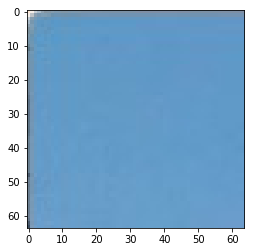

In [895]:
# Code Block 19
frame = window(image1)
slot = next(frame)
plt.imshow(image1[slot[0]:slot[1],slot[2]:slot[3]])

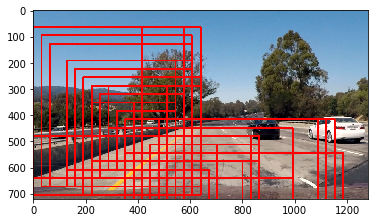

In [896]:
# Code Block 20
cars = []
carornot = next(frame)
while carornot != None:
    if clf2.predict([
        featurizer(image1[carornot[0]:carornot[1],
                         carornot[2]:carornot[3]])]):
        cars.append(carornot)
    carornot = next(frame)
    img = np.copy(image1)
for car in cars:
    cv2.rectangle(img, (car[0], car[1]),
                  (car[2], car[3]), color = (255, 0, 0), thickness=6)
plt.imshow(img)

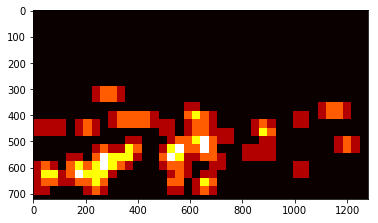

In [898]:
# Code Block 21
heatframe = np.zeros_like(grayscale(image1))
for car in cars:
    heatframe[car[0]:car[1],car[2]:car[3]]+=1
plt.imshow(heatframe, cmap="hot")

## Final Steps

In [1]:
# Code Block 01
#importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import math
import glob
import os
from sklearn.externals import joblib
from skimage.feature import hog
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
# Code Block 02
folder_cars1 = "training/small/vehicles_smallset/cars1/"
folder_cars2 = "training/small/vehicles_smallset/cars2/"
folder_cars3 = "training/small/vehicles_smallset/cars3/"
folder_noncars1 = "training/small/non-vehicles_smallset/notcars1/"
folder_noncars2 = "training/small/non-vehicles_smallset/notcars2/"
folder_noncars3 = "training/small/non-vehicles_smallset/notcars3/"

In [178]:
# Code Block 09
def featurizer(img):
    kernel_size = 5
    pixfeatures = cv2.GaussianBlur(
        cv2.resize(img, (64,64)), (kernel_size, kernel_size), 0)
    #pixfeatures1 = cv2.resize(pixfeatures[:,:,0],(16,16))
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    #sat = img[:,:,1]
    #pixfeatures1 = cv2.resize(hsv[:,:,0],(16,16))
    #gray = img[:,:,0]
    ch1 = pixfeatures[:,:,0]
    ch2 = pixfeatures[:,:,1]
    ch3 = pixfeatures[:,:,2]
    orient = 9
    pix_per_cell = ch1.shape[0]/8
    cell_per_block = 2
    # Call our function with vis=True to see an image output
    hogfeatures1 = get_hog_features(ch1, orient, 
                pix_per_cell, cell_per_block,
                vis=False, feature_vec=False)
    hogfeatures2 = get_hog_features(ch2, orient, 
                pix_per_cell, cell_per_block,
                vis=False, feature_vec=False)
    hogfeatures3 = get_hog_features(ch3, orient, 
                pix_per_cell, cell_per_block,
                vis=False, feature_vec=False)
    bins_range=(0, 256)
    #hist1 = np.histogram(img[:,:,0], bins=32, range=bins_range)
    hist2 = np.histogram(img[:,:,2], bins=32, range=bins_range)
    #hist3 = np.histogram(img[:,:,2], bins=32, range=bins_range)
    #histfeatures = np.concatenate((hist1[0], hist2[0], hist3[0]))
    feature_list = [hogfeatures1.ravel(), hogfeatures2.ravel(), hogfeatures3.ravel(), hist2[0].ravel()/255]
    # Create an array stack, NOTE: StandardScaler() expects np.float64
    X = np.concatenate(feature_list).astype(np.float64)
    X = X.reshape(-1, 1)
    X_scaler = StandardScaler().fit(X)
    # Apply the scaler to X
    scaled_X = X_scaler.transform(X)
    return np.ravel(scaled_X)

In [211]:
# Code Block 10
# And our file dirs for the pipeline test
images_cars = glob.glob(folder_cars1 + '*.jpeg')
images_cars = np.concatenate((images_cars,
                glob.glob(folder_cars2 + '*.jpeg'),
                glob.glob(folder_cars3 + '*.jpeg'),
               ))
images_notcars = glob.glob(folder_noncars1 + '*.jpeg')
images_notcars = np.concatenate((images_notcars,
                glob.glob(folder_noncars2 + '*.jpeg'),
                glob.glob(folder_noncars3 + '*.jpeg'),
               ))

Y = []
X = []
for image_name in images_cars:
    image = mpimg.imread(image_name)
    if len(image):
        tempfeat = featurizer(image)
        X.append(tempfeat)
        Y.append(1)
    del image
for image_name in images_notcars:
    image = mpimg.imread(image_name)
    if len(image):
        tempfeat = featurizer(image)
        X.append(tempfeat)
        Y.append(0)
    del image
print(len(Y))
print(len(X))
print(len(X[0]))

2321
2321
5324


In [212]:
# Code Block 11

# Shuffle the data
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [200]:
# Code Block 12
print("The train set length is:")
print("Labels ", len(y_train))
print("Samples ", len(X_train))
print("The test set length is:")
print("Labels ", len(y_test))
print("Samples ", len(X_test))

The train set length is:
Labels  1856
Samples  1856
The test set length is:
Labels  465
Samples  465


In [213]:
# Code Block 13
from sklearn import svm
from sklearn.svm import LinearSVC
clf = svm.SVC()
clf.fit(X_train, y_train)
train_precision = clf.score(X_train, y_train)
test_precision = clf.score(X_test, y_test)
print("train precision: ",train_precision)
print("test_precision: ", test_precision)
del X_train
del y_train
del X_test
del y_test
del X
del Y

train precision:  0.997844827586
test_precision:  0.989247311828


In [214]:
# Code Block 15
# Save the model for future use

joblib.dump(clf, 'SVCmodelII.pkl') 

['SVCmodelII.pkl']

In [215]:
# Code Block 16
clf2 = joblib.load('SVCmodelII.pkl') 

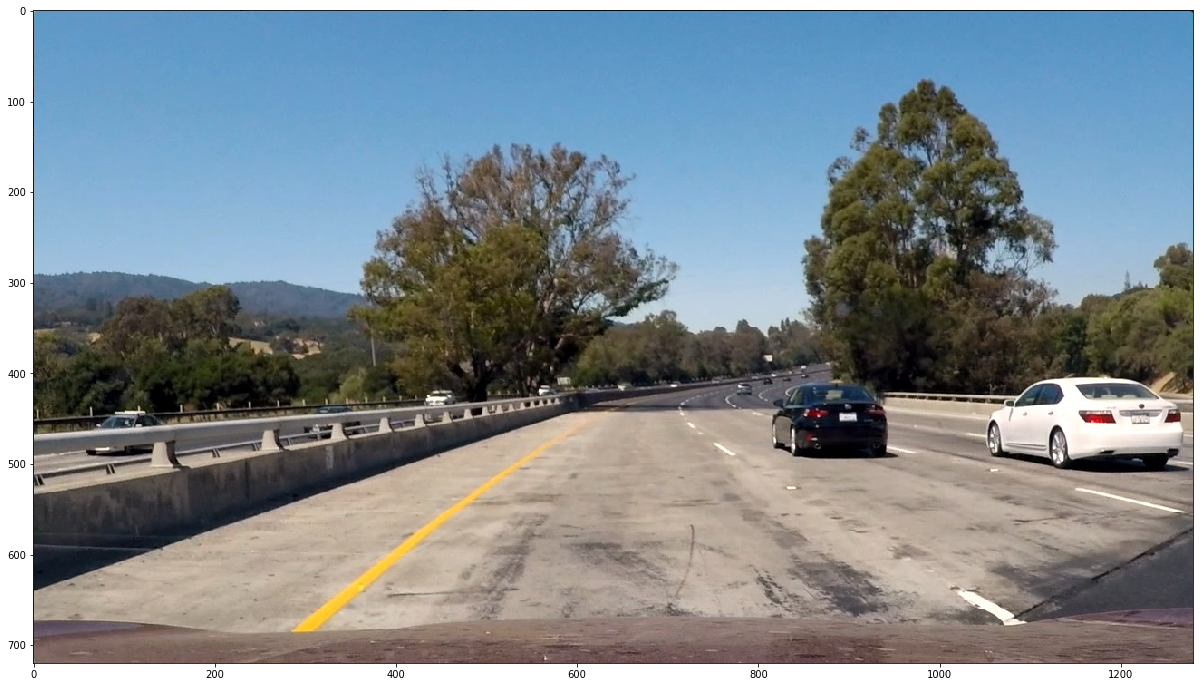

In [216]:
def window(img, x_start_stop=[None, None], y_start_stop=[None, None], 
                    xy_window=(64, 64), xy_overlap=(0.5, 0.5)):
    xstrtstop = [0, img.shape[1]]
    ystrtstop = [0, img.shape[0]]
    if x_start_stop[0] != None:
        xstrtstop[0] = x_start_stop[0]
    if x_start_stop[1] != None:
        xstrtstop[1] = x_start_stop[1] 
    if y_start_stop[0] != None:
        ystrtstop[0] = y_start_stop[0] 
    if y_start_stop[1] != None:
        ystrtstop[1] = y_start_stop[1]
    # Compute the span of the region to be searched    
    xspan = xstrtstop[1] - xstrtstop[0]
    yspan = ystrtstop[1] - ystrtstop[0]
    # Compute the number of pixels per step in x/y
    nx_pix_per_step = np.int(xy_window[0]*(1 - xy_overlap[0]))
    ny_pix_per_step = np.int(xy_window[1]*(1 - xy_overlap[1]))
    # Compute the number of windows in x/y
    nx_buffer = np.int(xy_window[0]*(xy_overlap[0]))
    ny_buffer = np.int(xy_window[1]*(xy_overlap[1]))
    nx_windows = np.int((xspan-nx_buffer)/nx_pix_per_step) 
    ny_windows = np.int((yspan-ny_buffer)/ny_pix_per_step)

    # Loop through finding x and y window positions
    # Note: you could vectorize this step, but in practice
    # you'll be considering windows one by one with your
    # classifier, so looping makes sense
    for ys in range(ny_windows):
        for xs in range(nx_windows):
            # Calculate window position
            startx = xs*nx_pix_per_step + xstrtstop[0]
            endx = startx + xy_window[0]
            starty = ys*ny_pix_per_step + ystrtstop[0]
            endy = starty + xy_window[1]
            # yield window
            window = [startx, endx, starty, endy]
            #print(window, startx- endx, starty- endy)
            if endx<=img.shape[1] and endy<=img.shape[0]:
                yield window
    # If the image is fully explored return None
    yield None
image1 = mpimg.imread('test_images/test1.jpg')
plt.imshow(image1)

In [217]:
def detectcars(img,window_size = 64, ystartstop=[None, None]):
    cars = []
    frame = window(img, xy_window=(window_size, window_size),
                   y_start_stop = ystartstop, xy_overlap=(0.9, 0.9))
    carornot = next(frame)
    while carornot != None:
        if clf2.predict([
            featurizer(image1[carornot[2]:carornot[3],
                             carornot[0]:carornot[1]])]):
            cars.append(carornot)
        carornot = next(frame)
        #print(carornot)
    img = np.copy(image1)
    return cars
ystart = 400
cars64 = detectcars(image1, window_size = 64, ystartstop=[ystart, None])
cars128 = detectcars(image1, window_size = 128, ystartstop=[ystart, None])
cars256 = detectcars(image1, window_size = 256, ystartstop=[ystart, None])
cars = []
if len(cars64)>0:
    cars = cars64
if len(cars128)>0:
    cars = np.concatenate((cars, cars128))
if len(cars256)>0:
    cars = np.concatenate((cars, cars256))

#cars = np.concatenate((cars32, cars64, cars128))
print(cars)

[[ 288  352  400  464]
 [ 294  358  400  464]
 [ 306  370  400  464]
 [ 312  376  400  464]
 [ 318  382  400  464]
 [ 324  388  400  464]
 [ 330  394  400  464]
 [ 372  436  400  464]
 [ 378  442  400  464]
 [ 384  448  400  464]
 [ 408  472  400  464]
 [ 414  478  400  464]
 [ 846  910  400  464]
 [ 852  916  400  464]
 [ 858  922  400  464]
 [ 864  928  400  464]
 [ 870  934  400  464]
 [ 876  940  400  464]
 [ 882  946  400  464]
 [1074 1138  400  464]
 [1080 1144  400  464]
 [1086 1150  400  464]
 [1092 1156  400  464]
 [1098 1162  400  464]
 [1116 1180  400  464]
 [1122 1186  400  464]
 [1128 1192  400  464]
 [1134 1198  400  464]
 [1140 1204  400  464]
 [1146 1210  400  464]
 [1152 1216  400  464]
 [1158 1222  400  464]
 [1164 1228  400  464]
 [1170 1234  400  464]
 [1176 1240  400  464]
 [1182 1246  400  464]
 [1188 1252  400  464]
 [ 294  358  406  470]
 [ 378  442  406  470]
 [ 408  472  406  470]
 [ 414  478  406  470]
 [ 420  484  406  470]
 [ 426  490  406  470]
 [ 828  892

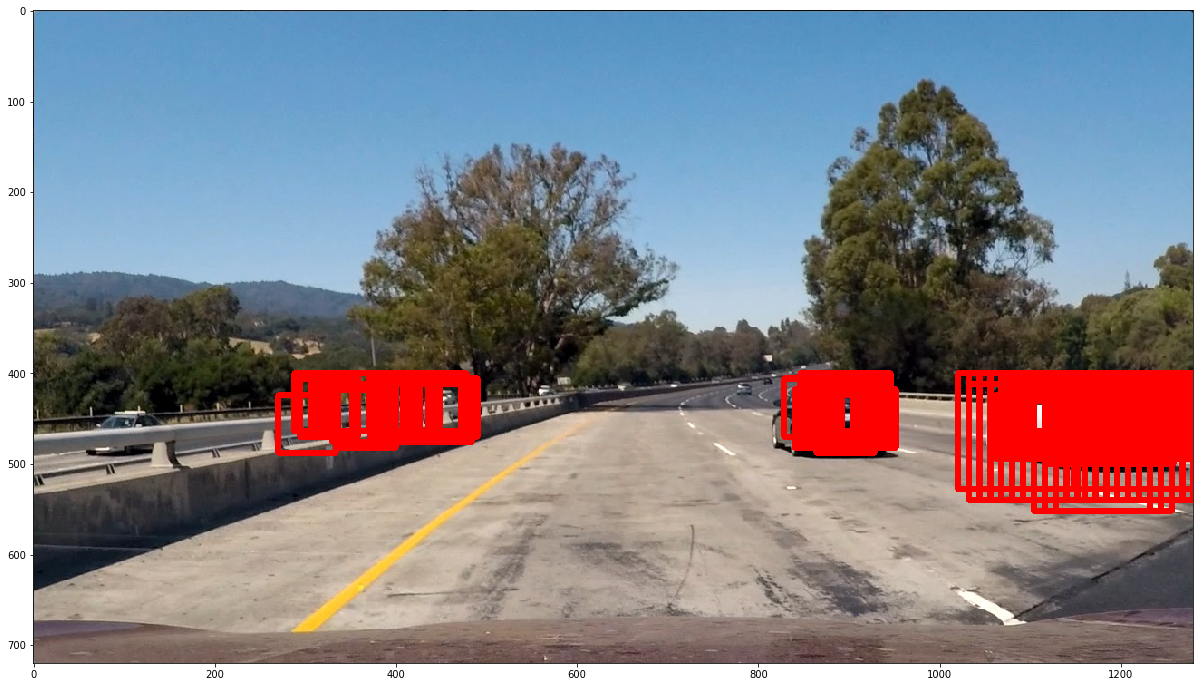

In [219]:
img = np.copy(image1)
for car in cars:
    cv2.rectangle(img, (car[0], car[2]),
                  (car[1], car[3]), color = (255, 0, 0), thickness=6)
fig_size= [24,12]
plt.rcParams["figure.figsize"] = fig_size
plt.imshow(img)

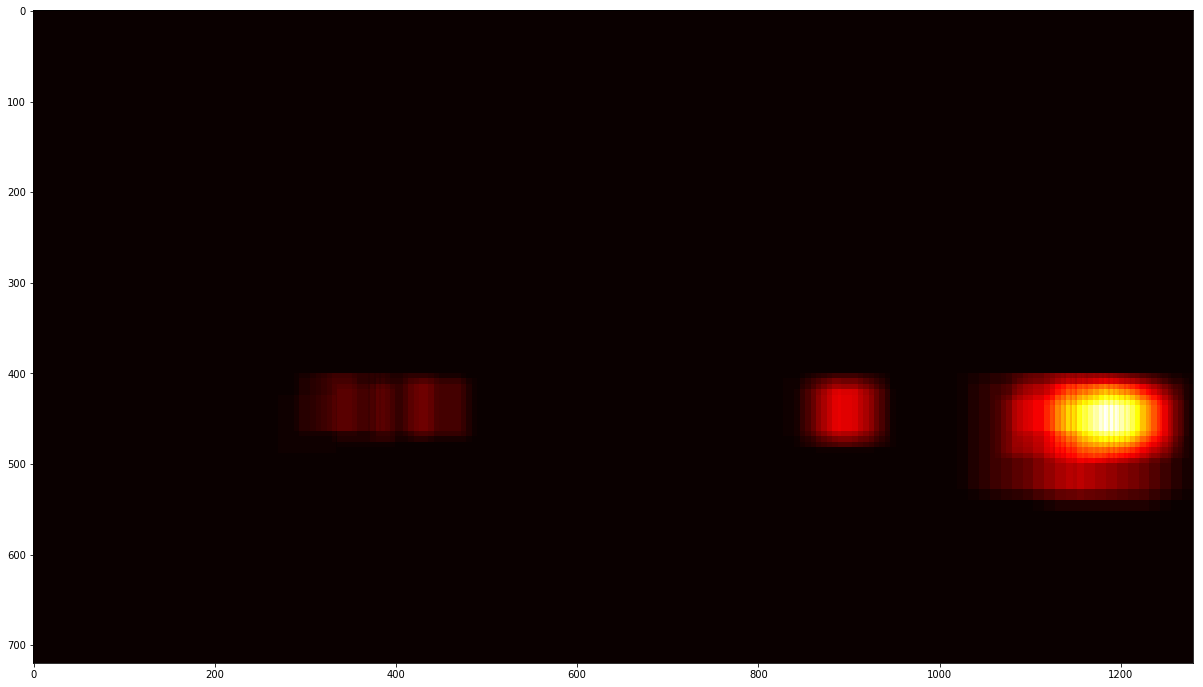

In [220]:
heatframe = np.zeros_like(grayscale(image1))
for car in cars:
    heatframe[car[2]:car[3],car[0]:car[1]]+=1
plt.imshow(heatframe, cmap="hot")

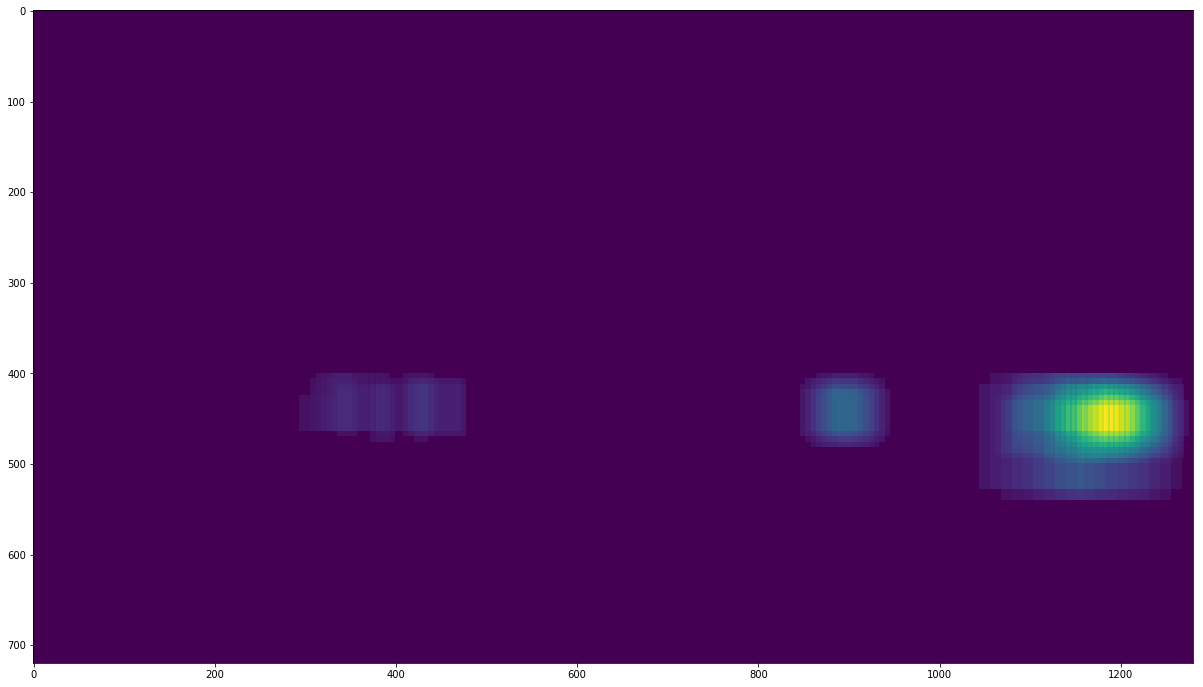

In [221]:
heat = np.copy(heatframe)
bins_range=(0, 200)
hist = np.histogram(heat, bins=32, range=bins_range)
#plt.plot(hist[0][0:-1])

#heatbinary = np.zeros_like(heat)
heat[(heat <= 4)] = 0
plt.imshow(heat)

3 cars found


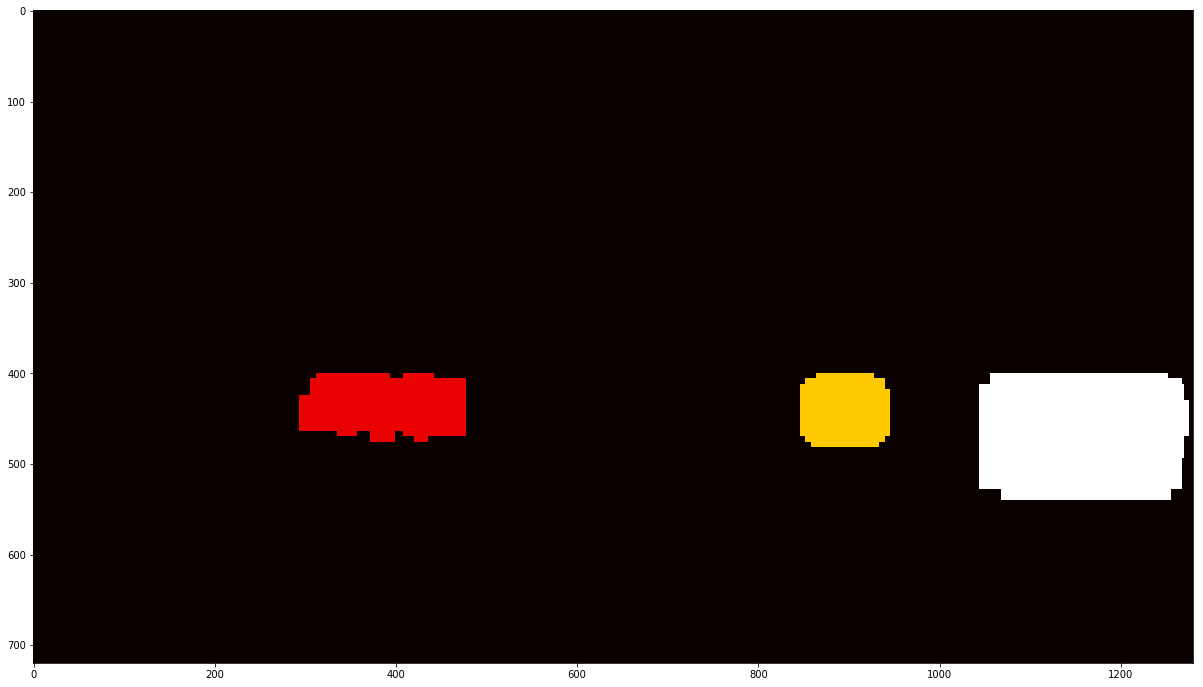

In [222]:
from scipy.ndimage.measurements import label
heatmap = np.copy(heat)
#heatmap = threshold(heatmap, 2)
labels = label(heatmap)
print(labels[1], 'cars found')
plt.imshow(labels[0], cmap="hot")

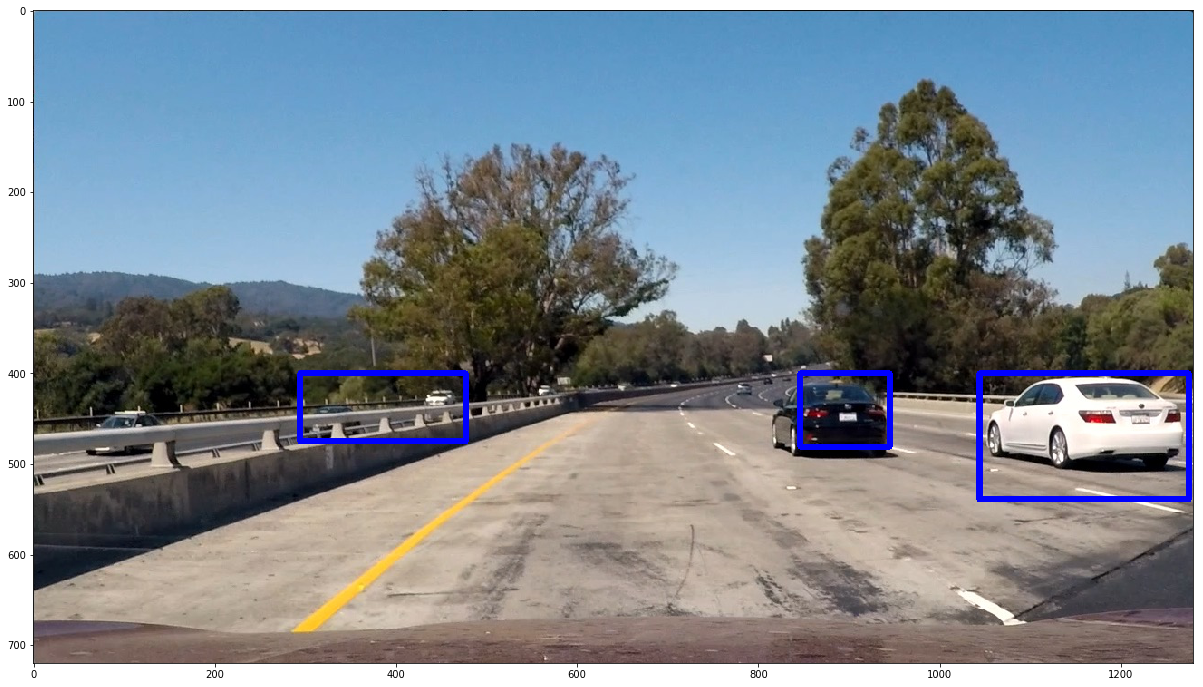

In [223]:
def draw_labeled_bboxes(img, labels):
    # Iterate through all detected cars
    for car_number in range(1, labels[1]+1):
        # Find pixels with each car_number label value
        nonzero = (labels[0] == car_number).nonzero()
        # Identify x and y values of those pixels
        nonzeroy = np.array(nonzero[0])
        nonzerox = np.array(nonzero[1])
        # Define a bounding box based on min/max x and y
        bbox = ((np.min(nonzerox), np.min(nonzeroy)), (np.max(nonzerox), np.max(nonzeroy)))
        # Draw the box on the image
        cv2.rectangle(img, bbox[0], bbox[1], (0,0,255), 6)
    # Return the image
    return img

# Draw bounding boxes on a copy of the image
draw_img = draw_labeled_bboxes(np.copy(image1), labels)
# Display the image
plt.imshow(draw_img)

## With the pipeline done, let's arm it

### First, divide and conquer

In [117]:
# Code Block 24
#importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import math
import glob
import os
from sklearn.externals import joblib
from skimage.feature import hog
from sklearn.preprocessing import StandardScaler
from scipy.ndimage.measurements import label
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

%matplotlib inline

In [232]:
# Code Block 25
# Define a class to receive the characteristics of each line detection
def featurizer(img):
    kernel_size = 5
    pixfeatures = cv2.GaussianBlur(
        cv2.resize(img, (64,64)), (kernel_size, kernel_size), 0)
    #pixfeatures1 = cv2.resize(pixfeatures[:,:,0],(16,16))
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    #sat = img[:,:,1]
    #pixfeatures1 = cv2.resize(hsv[:,:,0],(16,16))
    #gray = img[:,:,0]
    ch1 = pixfeatures[:,:,0]
    ch2 = pixfeatures[:,:,1]
    ch3 = pixfeatures[:,:,2]
    orient = 9
    pix_per_cell = ch1.shape[0]/8
    cell_per_block = 2
    # Call our function with vis=True to see an image output
    hogfeatures1 = get_hog_features(ch1, orient, 
                pix_per_cell, cell_per_block,
                vis=False, feature_vec=False)
    hogfeatures2 = get_hog_features(ch2, orient, 
                pix_per_cell, cell_per_block,
                vis=False, feature_vec=False)
    hogfeatures3 = get_hog_features(ch3, orient, 
                pix_per_cell, cell_per_block,
                vis=False, feature_vec=False)
    bins_range=(0, 256)
    #hist1 = np.histogram(img[:,:,0], bins=32, range=bins_range)
    hist2 = np.histogram(img[:,:,2], bins=32, range=bins_range)
    #hist3 = np.histogram(img[:,:,2], bins=32, range=bins_range)
    #histfeatures = np.concatenate((hist1[0], hist2[0], hist3[0]))
    feature_list = [hogfeatures1.ravel(), hogfeatures2.ravel(), hogfeatures3.ravel(), hist2[0].ravel()/255]
    # Create an array stack, NOTE: StandardScaler() expects np.float64
    X = np.concatenate(feature_list).astype(np.float64)
    X = X.reshape(-1, 1)
    X_scaler = StandardScaler().fit(X)
    # Apply the scaler to X
    scaled_X = X_scaler.transform(X)
    return np.ravel(scaled_X)

# Define a function to return HOG features and visualization
def get_hog_features(img, orient, pix_per_cell, cell_per_block, vis=False, feature_vec=True):
    if vis == True:
        # Use skimage.hog() to get both features and a visualization
        features ,hog_image = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell,pix_per_cell) , cells_per_block=(cell_per_block, cell_per_block), visualise=vis, feature_vector=feature_vec)
        return features, hog_image
    else:      
        # Use skimage.hog() to get features only
        features = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell,pix_per_cell) , cells_per_block=(cell_per_block, cell_per_block), visualise=vis, feature_vector=feature_vec)
        return features

def window(img, x_start_stop=[None, None], y_start_stop=[None, None], 
                    xy_window=(64, 64), xy_overlap=(0.5, 0.5)):
    xstrtstop = [0, img.shape[1]]
    ystrtstop = [0, img.shape[0]]
    if x_start_stop[0] != None:
        xstrtstop[0] = x_start_stop[0]
    if x_start_stop[1] != None:
        xstrtstop[1] = x_start_stop[1] 
    if y_start_stop[0] != None:
        ystrtstop[0] = y_start_stop[0] 
    if y_start_stop[1] != None:
        ystrtstop[1] = y_start_stop[1]
    # Compute the span of the region to be searched    
    xspan = xstrtstop[1] - xstrtstop[0]
    yspan = ystrtstop[1] - ystrtstop[0]
    # Compute the number of pixels per step in x/y
    nx_pix_per_step = np.int(xy_window[0]*(1 - xy_overlap[0]))
    ny_pix_per_step = np.int(xy_window[1]*(1 - xy_overlap[1]))
    # Compute the number of windows in x/y
    nx_buffer = np.int(xy_window[0]*(xy_overlap[0]))
    ny_buffer = np.int(xy_window[1]*(xy_overlap[1]))
    nx_windows = np.int((xspan-nx_buffer)/nx_pix_per_step) 
    ny_windows = np.int((yspan-ny_buffer)/ny_pix_per_step)

    # Loop through finding x and y window positions
    # Note: you could vectorize this step, but in practice
    # you'll be considering windows one by one with your
    # classifier, so looping makes sense
    for ys in range(ny_windows):
        for xs in range(nx_windows):
            # Calculate window position
            startx = xs*nx_pix_per_step + xstrtstop[0]
            endx = startx + xy_window[0]
            starty = ys*ny_pix_per_step + ystrtstop[0]
            endy = starty + xy_window[1]
            # yield window
            window = [startx, endx, starty, endy]
            #print(window, startx- endx, starty- endy)
            if endx<=img.shape[1] and endy<=img.shape[0]:
                yield window
    # If the image is fully explored return None
    yield None

def detectcars(img,window_size = 64, ystartstop=[None, None], overlap = 0.5):
    cars = []
    frame = window(img, xy_window=(window_size, window_size),
                   y_start_stop = ystartstop, xy_overlap=(overlap, overlap))
    carornot = next(frame)
    while carornot != None:
        if clf2.predict([
            featurizer(img[carornot[2]:carornot[3],
                             carornot[0]:carornot[1]])]):
            cars.append(carornot)
        carornot = next(frame)
    return cars

def draw_labeled_bboxes(img, labels):
    # Iterate through all detected cars
    for car_number in range(1, labels[1]+1):
        # Find pixels with each car_number label value
        nonzero = (labels[0] == car_number).nonzero()
        # Identify x and y values of those pixels
        nonzeroy = np.array(nonzero[0])
        nonzerox = np.array(nonzero[1])
        # Define a bounding box based on min/max x and y
        bbox = ((np.min(nonzerox), np.min(nonzeroy)), (np.max(nonzerox), np.max(nonzeroy)))
        # Draw the box on the image
        cv2.rectangle(img, bbox[0], bbox[1], (0,0,255), 6)
    # Return the image
    return img

In [134]:
# Code Block 02
folderC = []
#folderC.append("training/big/vehicles/GTI*/")
folderC.append("training/small/vehicles_smallset/cars1/")
folderC.append("training/small/vehicles_smallset/cars2/")
folderC.append("training/small/vehicles_smallset/cars3/")
folderNC = []
#folderNC = "training/big/non-vehicles/Extras/"
folderNC.append("training/small/non-vehicles_smallset/notcars1/")
folderNC.append("training/small/non-vehicles_smallset/notcars2/")
folderNC.append("training/small/non-vehicles_smallset/notcars3/")

In [135]:
# Code Block 10
# And our file dirs for the pipeline test
images_cars = []#glob.glob(folderC[0] + '*.png')
for folder in folderC:
    images_cars.extend(glob.glob(folder + '*.jpeg'))
    print("Vehicles Samples: ",len(images_cars))

#images_notcars = glob.glob(folderNC + '*.png')
images_notcars = []
for folder in folderNC:
    images_notcars.extend(glob.glob(folder + '*.jpeg'))
    print("Non-vehicles Samples: ",len(images_notcars))
Y = []
X = []
for image_name in images_cars:
    image = mpimg.imread(image_name)
    if len(image):
        tempfeat = featurizer(image)
        X.append(tempfeat)
        Y.append(1)
    del image
for image_name in images_notcars:
    image = mpimg.imread(image_name)
    if len(image):
        tempfeat = featurizer(image)
        X.append(tempfeat)
        Y.append(0)
    del image
print("Total Labels: ", len(Y))
print("Total Samples: ", len(X))
print("Total features per sample: ", len(X[0]))

Vehicles Samples:  398
Vehicles Samples:  797
Vehicles Samples:  1197
Non-vehicles Samples:  399
Non-vehicles Samples:  799
Non-vehicles Samples:  1125
Total Labels:  2322
Total Samples:  2322
Total features per sample:  5324


In [136]:
# Code Block 11

# Shuffle the data
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [137]:
# Code Block 12
print("The train set length is:")
print("Labels ", len(y_train))
print("Samples ", len(X_train))
print("The test set length is:")
print("Labels ", len(y_test))
print("Samples ", len(X_test))

The train set length is:
Labels  1857
Samples  1857
The test set length is:
Labels  465
Samples  465


In [138]:
# Code Block 13
from sklearn import svm
from sklearn.svm import LinearSVC
clf = LinearSVC()
clf.fit(X_train, y_train)
train_precision = clf.score(X_train, y_train)
test_precision = clf.score(X_test, y_test)
print("train precision: ",train_precision)
print("test_precision: ", test_precision)

train precision:  1.0
test_precision:  0.984946236559


In [139]:
del X_train
del y_train
del X_test
del y_test
del X
del Y
print("Training Data Deleted")

Training Data Deleted


In [140]:
joblib.dump(clf, 'SVCmodelIII.pkl') 

['SVCmodelIII.pkl']

In [370]:
def trainer(dataset = 'small', method = 'LinearSVC', c=1.0, g='auto', k='linear'):
    if dataset == 'small':
        print("Loading Small dataset")
        folderC = []
        folderC.append("training/small/vehicles_smallset/cars1/")
        folderC.append("training/small/vehicles_smallset/cars2/")
        folderC.append("training/small/vehicles_smallset/cars3/")
        folderNC = []
        folderNC.append("training/small/non-vehicles_smallset/notcars1/")
        folderNC.append("training/small/non-vehicles_smallset/notcars2/")
        folderNC.append("training/small/non-vehicles_smallset/notcars3/")
    else:
        print("Loading Large dataset")
        folderC = ["training/big/vehicles/GTI*/"]
        folderC.append("training/small/vehicles_smallset/cars1/")
        folderC.append("training/small/vehicles_smallset/cars2/")
        folderC.append("training/small/vehicles_smallset/cars3/")
        folderNC = ["training/big/non-vehicles/Extras/"]
   # And our file dirs for the pipeline test
    images_cars = []
    for folder in folderC:
        images_cars.extend(glob.glob(folder + '*.jpeg'))
        images_cars.extend(glob.glob(folder + '*.png'))
    print("Vehicles Samples: ",len(images_cars))
    images_notcars = []
    for folder in folderNC:
        images_notcars.extend(glob.glob(folder + '*.jpeg'))
        images_notcars.extend(glob.glob(folder + '*.png'))
    print("Non-vehicles Samples: ",len(images_notcars))
    Y = []
    X = []
    for image_name in images_cars:
        image = mpimg.imread(image_name)
        if len(image):
            tempfeat = featurizer(image)
            X.append(tempfeat)
            Y.append(1)
        del image
    for image_name in images_notcars:
        image = mpimg.imread(image_name)
        if len(image):
            tempfeat = featurizer(image)
            X.append(tempfeat)
            Y.append(0)
        del image
    print("Total Labels: ", len(Y))
    print("Total Samples: ", len(X))
    print("Total features per sample: ", len(X[0]))
    x, y = shuffle(X,Y)
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    print("The train set have:")
    print(len(y_train), " Labels")
    print(len(X_train), " Samples")
    print("The test set have:")
    print(len(y_test), "Labels ")
    print(len(X_test), " Samples")
    if method == 'LinearSVC':
        clf = LinearSVC(C=c)
    else:
        clf = svm.SVC(C=c, kernel=k, gamma = g)
    clf.fit(X_train, y_train)
    train_precision = clf.score(X_train, y_train)
    test_precision = clf.score(X_test, y_test)
    print("train precision: ",train_precision)
    print("test_precision: ", test_precision)
    return clf

In [378]:
def MRdetectcar(img, maxsize = 64, th = 0, o = 0.3):
    sizes = [maxsize//8, maxsize//4, maxsize//2, maxsize]
    y = img.shape[0]
    ystartstops = [[y//16, None],[y//8, None], [y//4, None], [y//2, None]]
    tempimg = cv2.resize(img, None,fx=1/2**(len(sizes)-1),
                         fy=1/2**(len(sizes)-1), interpolation = cv2.INTER_CUBIC)
    heatmap = np.zeros_like(tempimg[:,:,0])
    cars = []

    for i in range(len(sizes)):
        tempheat = np.zeros_like(tempimg[:,:,0])
        yss = ystartstops[i]
        cars = detectcars(tempimg, window_size = sizes[i], ystartstop=yss, overlap = o)
        for car in cars:
            tempheat[car[2]:car[3],car[0]:car[1]]+=1
        tempheat[(tempheat <= th)] = 0
        heatmap += tempheat
        heatmap = cv2.resize(heatmap, None, fx=2, fy=2, interpolation = cv2.INTER_CUBIC)
        tempimg = cv2.resize(img, None,fx=1/2**(len(sizes)-i-2),
                             fy=1/2**(len(sizes)-i-2), interpolation = cv2.INTER_CUBIC)
    heatmap = cv2.resize(heatmap, None, fx=1/2, fy=1/2, interpolation = cv2.INTER_CUBIC)
    return heatmap

In [322]:
clf2 = joblib.load('SVCmodelIV.pkl')

### And now lets try it all trogether [One pass]

Loading Large dataset
Vehicles Samples:  2826
Non-vehicles Samples:  5068
Total Labels:  7894
Total Samples:  7894
Total features per sample:  5324
The train set have:
6315  Labels
6315  Samples
The test set have:
1579 Labels 
1579  Samples
train precision:  1.0
test_precision:  0.965167827739


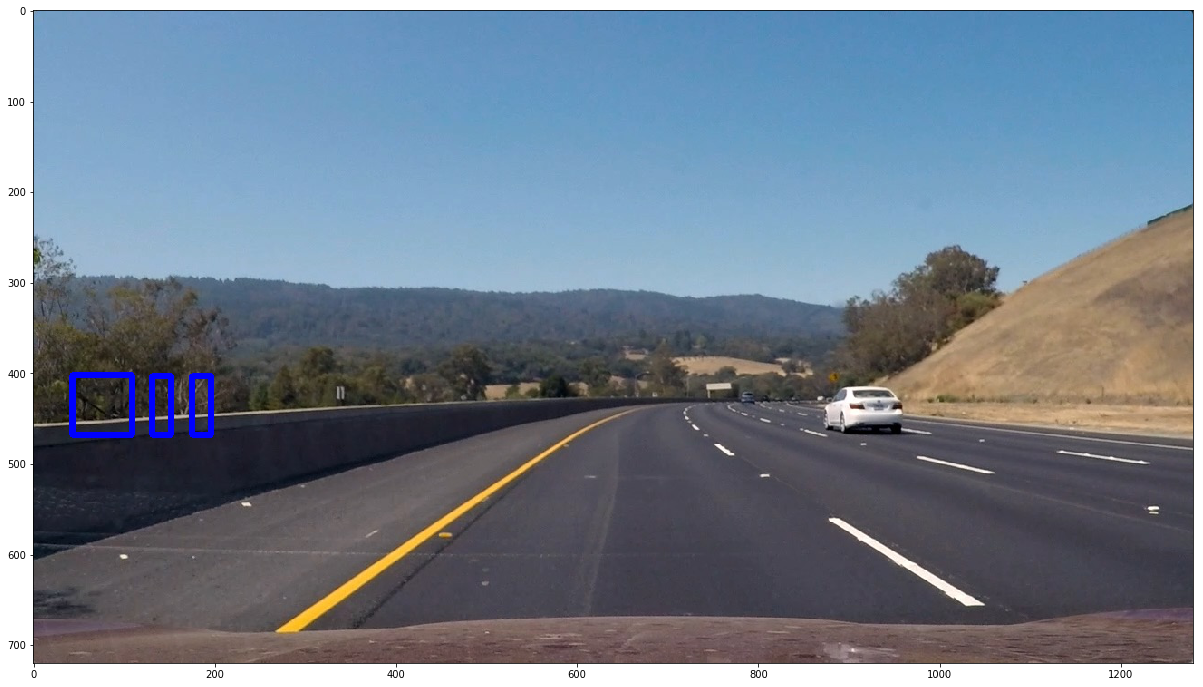

In [355]:
clf = trainer('large', c=0.3, method = 'SVC', g=10)
joblib.dump(clf, 'SVCmodelIV.pkl')
# Display the image
test_image = mpimg.imread('test_images/test3.jpg')
heatmap = MRdetectcar(test_image, th = 1)
labels = label(heatmap.astype(int))
# Draw bounding boxes on a copy of the image
draw_img = np.copy(test_image)
draw_img = draw_labeled_bboxes(test_image, labels)
plt.imshow(draw_img)

In [379]:
def car_detect_pipeline(img, th = 0, sizes = [32, 64, 128], o=0.3):
    global globalheatmap
    tempheatmap = np.zeros_like(img[:,:,0])
    for size in sizes:
        tempheatmap += MRdetectcar(img, size, th, o)
    globalheatmap = (globalheatmap + tempheatmap)//2
    labels = label(globalheatmap.astype(int))
    # Draw bounding boxes on a copy of the image
    draw_img = np.copy(test_image)
    draw_img = draw_labeled_bboxes(test_image, labels)
    return draw_img

Loading Large dataset
Vehicles Samples:  4023
Non-vehicles Samples:  5068
Total Labels:  9091
Total Samples:  9091
Total features per sample:  5324
The train set have:
7272  Labels
7272  Samples
The test set have:
1819 Labels 
1819  Samples
train precision:  1.0
test_precision:  0.97526113249


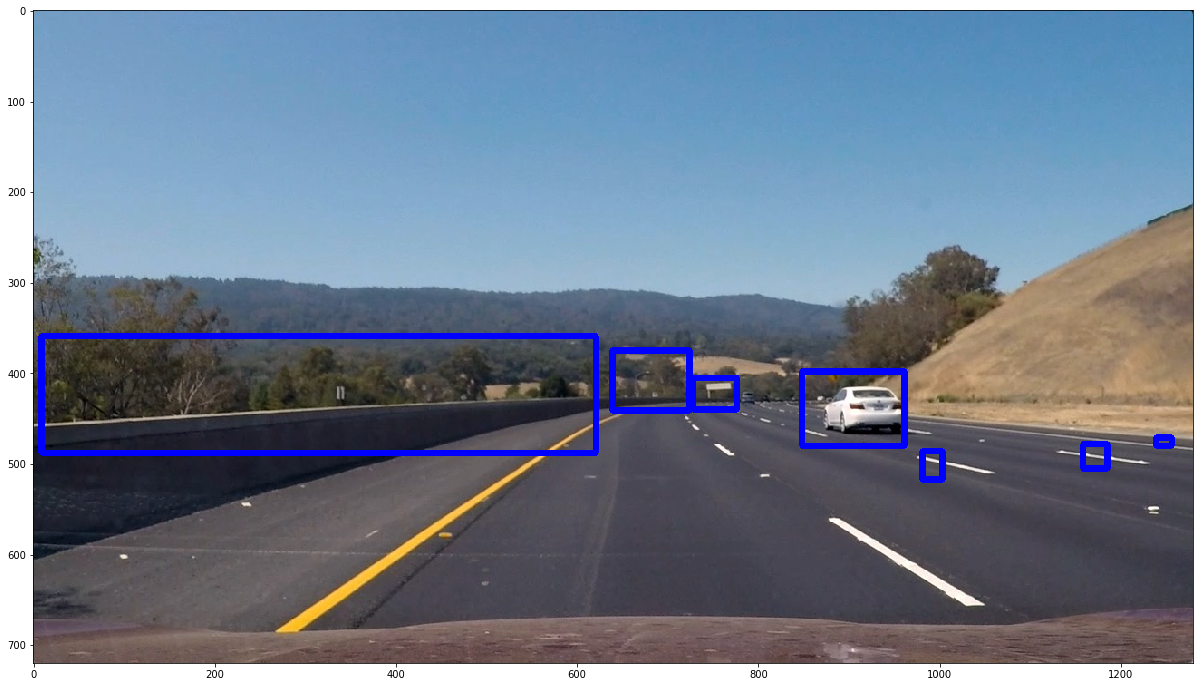

In [382]:
clf = trainer('large', c=0.5, method = 'SVC', g=10, k = 'poly')
joblib.dump(clf, 'SVCmodelIV.pkl')
# Display the image
test_image = mpimg.imread('test_images/test3.jpg')
globalheatmap = np.zeros_like(test_image[:,:,0])
fig_size= [24, 12]
plt.rcParams["figure.figsize"] = fig_size
plt.imshow(car_detect_pipeline(test_image, th = 2, o=0.7))

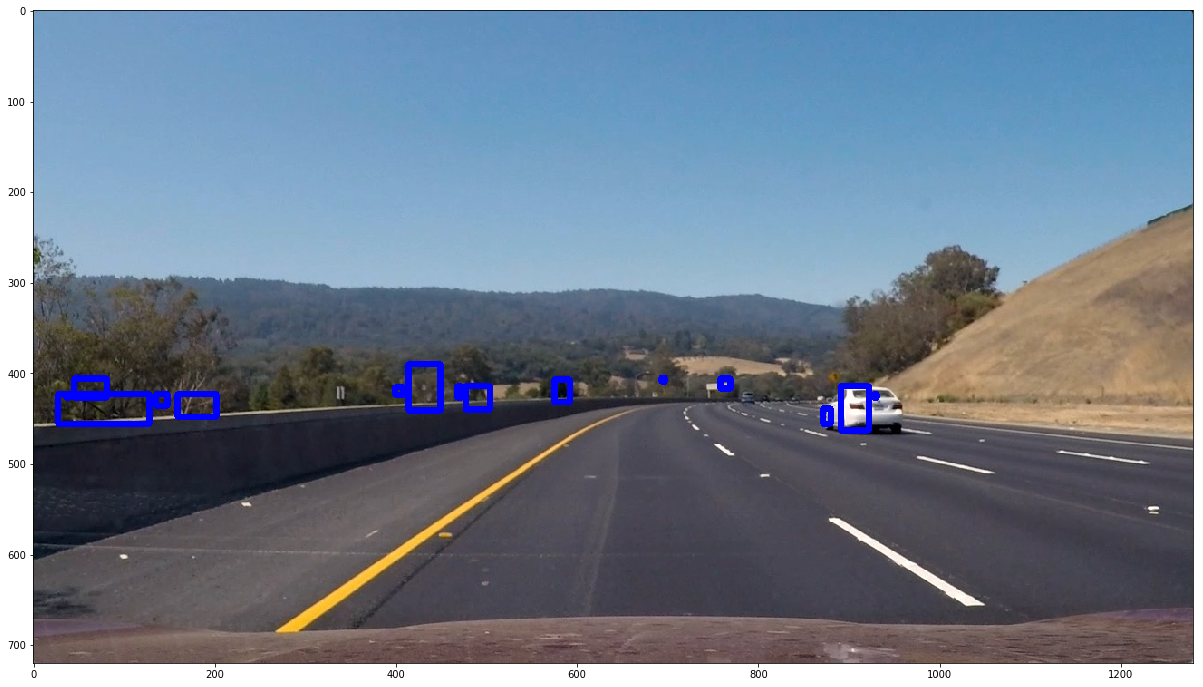

In [388]:
test_image = mpimg.imread('test_images/test3.jpg')
globalheatmap = np.zeros_like(test_image[:,:,0])
fig_size= [24, 12]
plt.rcParams["figure.figsize"] = fig_size
plt.imshow(car_detect_pipeline(test_image, th = 5, sizes = [32, 64, 128], o=0.7))

### Now let's find the best lane lines candidates

### Based on the best candidates averages the top best positive and negative slopes are draw

## Test on Videos

You know what's cooler than drawing lanes over images? Drawing lanes over video!

We can test our solution on two provided videos:

`solidWhiteRight.mp4`

`solidYellowLeft.mp4`

**Note: if you get an `import error` when you run the next cell, try changing your kernel (select the Kernel menu above --> Change Kernel).  Still have problems?  Try relaunching Jupyter Notebook from the terminal prompt. Also, check out [this forum post](https://carnd-forums.udacity.com/questions/22677062/answers/22677109) for more troubleshooting tips.**

**If you get an error that looks like this:**
```
NeedDownloadError: Need ffmpeg exe. 
You can download it by calling: 
imageio.plugins.ffmpeg.download()
```
**Follow the instructions in the error message and check out [this forum post](https://carnd-forums.udacity.com/display/CAR/questions/26218840/import-videofileclip-error) for more troubleshooting tips across operating systems.**

In [18]:
# Code Block 31
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

Let's try the one with the solid white lane on the right first ...

In [389]:
# Code Block 32
#lane = Line()
white_output = 'project_simon.mp4'
clip1 = VideoFileClip("test_video.mp4")
white_clip = clip1.fl_image(car_detect_pipeline) #NOTE: this function expects color images!!
%time white_clip.write_videofile(white_output, audio=False)

[MoviePy] >>>> Building video project_simon.mp4
[MoviePy] Writing video project_simon.mp4


 97%|█████████▋| 38/39 [07:55<00:12, 12.51s/it]


[MoviePy] Done.
[MoviePy] >>>> Video ready: project_simon.mp4 

CPU times: user 8min 11s, sys: 112 ms, total: 8min 11s
Wall time: 7min 55s


Play the video inline, or if you prefer find the video in your filesystem (should be in the same directory) and play it in your video player of choice.

In [390]:
# Code Block 33
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(white_output))

Now for the one with the solid yellow lane on the left. This one's more tricky!

## Writeup and Submission

If you're satisfied with your video outputs, it's time to make the report writeup in a pdf or markdown file. Once you have this Ipython notebook ready along with the writeup, it's time to submit for review! Here is a [link](https://github.com/simonmijares/CarNDT1P4.git) to the project.
